In [1]:
import re
import matplotlib.pyplot as plt

# Example paragraphs (you should replace these with your actual paragraphs)
paragraphs = [
    """
    No checkpoints found.	
Epoch 1: Loss: 0.2880, Accuracy: 67.1905%, F1 Score: 0.6061, Precision: 0.7582, Recall: 0.5048	
Validation Loss: 0.2298, Validation Accuracy: 76.8889%, F1 Score: 0.7347, Precision: 0.8623, Recall: 0.6400	
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_1.pth	
Epoch 2: Loss: 0.2332, Accuracy: 75.0952%, F1 Score: 0.7128, Precision: 0.8418, Recall: 0.6181	
Validation Loss: 0.2557, Validation Accuracy: 75.1111%, F1 Score: 0.6989, Precision: 0.8844, Recall: 0.5778	
Epoch 3: Loss: 0.2077, Accuracy: 78.4762%, F1 Score: 0.7578, Precision: 0.8664, Recall: 0.6733	
Validation Loss: 0.2124, Validation Accuracy: 82.2222%, F1 Score: 0.8131, Precision: 0.8571, Recall: 0.7733	
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_3.pth	
Epoch 4: Loss: 0.1837, Accuracy: 80.9048%, F1 Score: 0.7841, Precision: 0.9021, Recall: 0.6933	
Validation Loss: 0.2362, Validation Accuracy: 81.5556%, F1 Score: 0.8207, Precision: 0.7983, Recall: 0.8444	
Epoch 5: Loss: 0.1807, Accuracy: 81.5238%, F1 Score: 0.7947, Precision: 0.8940, Recall: 0.7152	
Validation Loss: 0.2209, Validation Accuracy: 80.6667%, F1 Score: 0.8291, Precision: 0.7430, Recall: 0.9378	
Epoch 6: Loss: 0.1472, Accuracy: 83.6667%, F1 Score: 0.8180, Precision: 0.9234, Recall: 0.7343	
Validation Loss: 0.2867, Validation Accuracy: 78.0000%, F1 Score: 0.8150, Precision: 0.7032, Recall: 0.9689	
Epoch 7: Loss: 0.1282, Accuracy: 87.1429%, F1 Score: 0.8594, Precision: 0.9483, Recall: 0.7857	
Validation Loss: 0.2314, Validation Accuracy: 80.8889%, F1 Score: 0.8147, Precision: 0.7908, Recall: 0.8400	
Epoch 8: Loss: 0.1251, Accuracy: 88.0000%, F1 Score: 0.8700, Precision: 0.9493, Recall: 0.8029	
Validation Loss: 0.3187, Validation Accuracy: 78.8889%, F1 Score: 0.8065, Precision: 0.7444, Recall: 0.8800	
Epoch 9: Loss: 0.1253, Accuracy: 87.6190%, F1 Score: 0.8664, Precision: 0.9408, Recall: 0.8029	
Validation Loss: 0.2486, Validation Accuracy: 83.5556%, F1 Score: 0.8204, Precision: 0.9037, Recall: 0.7511	
Epoch 10: Loss: 0.0965, Accuracy: 90.8095%, F1 Score: 0.9011, Precision: 0.9756, Recall: 0.8371	
Validation Loss: 0.2874, Validation Accuracy: 79.5556%, F1 Score: 0.7553, Precision: 0.9404, Recall: 0.6311	
Epoch 11: Loss: 0.0792, Accuracy: 91.7143%, F1 Score: 0.9113, Precision: 0.9803, Recall: 0.8514	
Validation Loss: 0.3729, Validation Accuracy: 75.7778%, F1 Score: 0.7753, Precision: 0.7231, Recall: 0.8356	
Epoch 12: Loss: 0.0909, Accuracy: 91.1429%, F1 Score: 0.9050, Precision: 0.9758, Recall: 0.8438	
Validation Loss: 0.2649, Validation Accuracy: 82.6667%, F1 Score: 0.8319, Precision: 0.8075, Recall: 0.8578	
Epoch 13: Loss: 0.0807, Accuracy: 91.9524%, F1 Score: 0.9144, Precision: 0.9762, Recall: 0.8600	
Validation Loss: 0.3171, Validation Accuracy: 80.2222%, F1 Score: 0.7916, Precision: 0.8366, Recall: 0.7511	
Epoch 14: Loss: 0.0553, Accuracy: 93.4762%, F1 Score: 0.9309, Precision: 0.9893, Recall: 0.8790	
Validation Loss: 0.3074, Validation Accuracy: 81.5556%, F1 Score: 0.8151, Precision: 0.8170, Recall: 0.8133	
Epoch 15: Loss: 0.0544, Accuracy: 93.6190%, F1 Score: 0.9320, Precision: 0.9978, Recall: 0.8743	
Validation Loss: 0.2915, Validation Accuracy: 79.7778%, F1 Score: 0.7973, Precision: 0.7991, Recall: 0.7956	
Epoch 16: Loss: 0.0586, Accuracy: 92.8095%, F1 Score: 0.9233, Precision: 0.9891, Recall: 0.8657	
Validation Loss: 0.5008, Validation Accuracy: 72.6667%, F1 Score: 0.7639, Precision: 0.6723, Recall: 0.8844	
Epoch 17: Loss: 0.0743, Accuracy: 92.4286%, F1 Score: 0.9197, Precision: 0.9795, Recall: 0.8667	
Validation Loss: 0.3065, Validation Accuracy: 81.3333%, F1 Score: 0.8108, Precision: 0.8219, Recall: 0.8000	
Epoch 18: Loss: 0.0503, Accuracy: 93.3333%, F1 Score: 0.9291, Precision: 0.9914, Recall: 0.8743	
Validation Loss: 0.2674, Validation Accuracy: 85.1111%, F1 Score: 0.8595, Precision: 0.8135, Recall: 0.9111	
Epoch 19: Loss: 0.0617, Accuracy: 92.1905%, F1 Score: 0.9163, Precision: 0.9868, Recall: 0.8552	
Validation Loss: 0.2784, Validation Accuracy: 84.0000%, F1 Score: 0.8356, Precision: 0.8592, Recall: 0.8133	
Epoch 20: Loss: 0.0453, Accuracy: 94.3333%, F1 Score: 0.9401, Precision: 0.9968, Recall: 0.8895	
Validation Loss: 0.3119, Validation Accuracy: 84.0000%, F1 Score: 0.8364, Precision: 0.8558, Recall: 0.8178	
Epoch 21: Loss: 0.0473, Accuracy: 94.4762%, F1 Score: 0.9419, Precision: 0.9926, Recall: 0.8962	
Validation Loss: 0.2118, Validation Accuracy: 87.7778%, F1 Score: 0.8724, Precision: 0.9126, Recall: 0.8356	
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_21.pth	
Epoch 22: Loss: 0.0580, Accuracy: 93.9048%, F1 Score: 0.9360, Precision: 0.9853, Recall: 0.8914	
Validation Loss: 0.2420, Validation Accuracy: 82.6667%, F1 Score: 0.8251, Precision: 0.8326, Recall: 0.8178	
Epoch 23: Loss: 0.0466, Accuracy: 93.5714%, F1 Score: 0.9314, Precision: 0.9978, Recall: 0.8733	
Validation Loss: 0.2490, Validation Accuracy: 85.5556%, F1 Score: 0.8513, Precision: 0.8774, Recall: 0.8267	
Epoch 24: Loss: 0.0329, Accuracy: 95.0952%, F1 Score: 0.9484, Precision: 1.0000, Recall: 0.9019	
Validation Loss: 0.2635, Validation Accuracy: 84.8889%, F1 Score: 0.8419, Precision: 0.8829, Recall: 0.8044	
Epoch 25: Loss: 0.0350, Accuracy: 95.1429%, F1 Score: 0.9489, Precision: 1.0000, Recall: 0.9029	
Validation Loss: 0.2667, Validation Accuracy: 84.8889%, F1 Score: 0.8426, Precision: 0.8792, Recall: 0.8089	
Epoch 26: Loss: 0.0339, Accuracy: 95.7143%, F1 Score: 0.9552, Precision: 1.0000, Recall: 0.9143	
Validation Loss: 0.2695, Validation Accuracy: 85.1111%, F1 Score: 0.8445, Precision: 0.8835, Recall: 0.8089	
Epoch 27: Loss: 0.0372, Accuracy: 94.1429%, F1 Score: 0.9378, Precision: 1.0000, Recall: 0.8829	
Validation Loss: 0.2724, Validation Accuracy: 85.3333%, F1 Score: 0.8465, Precision: 0.8878, Recall: 0.8089	
Epoch 28: Loss: 0.0358, Accuracy: 94.6667%, F1 Score: 0.9437, Precision: 1.0000, Recall: 0.8933	
Validation Loss: 0.2730, Validation Accuracy: 85.3333%, F1 Score: 0.8465, Precision: 0.8878, Recall: 0.8089	
Epoch 29: Loss: 0.0343, Accuracy: 94.8571%, F1 Score: 0.9458, Precision: 1.0000, Recall: 0.8971	
Validation Loss: 0.2738, Validation Accuracy: 85.3333%, F1 Score: 0.8465, Precision: 0.8878, Recall: 0.8089	
Epoch 30: Loss: 0.0368, Accuracy: 95.0952%, F1 Score: 0.9484, Precision: 1.0000, Recall: 0.9019	
Validation Loss: 0.2747, Validation Accuracy: 85.3333%, F1 Score: 0.8465, Precision: 0.8878, Recall: 0.8089		
    """,
    """
    No checkpoints found.											
Epoch 1: Loss: 0.2882, Accuracy: 67.2857%, F1 Score: 0.6072, Precision: 0.7597, Recall: 0.5057											
Validation Loss: 0.2698, Validation Accuracy: 74.0000%, F1 Score: 0.7194, Precision: 0.7812, Recall: 0.6667											
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_1.pth											
Epoch 2: Loss: 0.2362, Accuracy: 75.6190%, F1 Score: 0.7205, Precision: 0.8440, Recall: 0.6286											
Validation Loss: 0.2628, Validation Accuracy: 74.0000%, F1 Score: 0.7347, Precision: 0.7500, Recall: 0.7200											
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_2.pth											
Epoch 3: Loss: 0.2095, Accuracy: 78.3810%, F1 Score: 0.7580, Precision: 0.8608, Recall: 0.6771											
Validation Loss: 0.3248, Validation Accuracy: 70.0000%, F1 Score: 0.6154, Precision: 0.8571, Recall: 0.4800											
Epoch 4: Loss: 0.1897, Accuracy: 80.0476%, F1 Score: 0.7751, Precision: 0.8881, Recall: 0.6876											
Validation Loss: 0.5778, Validation Accuracy: 55.3333%, F1 Score: 0.6912, Precision: 0.5282, Recall: 1.0000											
Epoch 5: Loss: 0.1604, Accuracy: 84.0952%, F1 Score: 0.8237, Precision: 0.9242, Recall: 0.7429											
Validation Loss: 0.2548, Validation Accuracy: 76.6667%, F1 Score: 0.7682, Precision: 0.7632, Recall: 0.7733											
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_5.pth											
Epoch 6: Loss: 0.1533, Accuracy: 83.9048%, F1 Score: 0.8202, Precision: 0.9289, Recall: 0.7343											
Validation Loss: 0.2704, Validation Accuracy: 74.6667%, F1 Score: 0.6833, Precision: 0.9111, Recall: 0.5467											
Epoch 7: Loss: 0.1315, Accuracy: 87.0000%, F1 Score: 0.8580, Precision: 0.9450, Recall: 0.7857											
Validation Loss: 0.8323, Validation Accuracy: 62.6667%, F1 Score: 0.4167, Precision: 0.9524, Recall: 0.2667											
Epoch 8: Loss: 0.0988, Accuracy: 90.0476%, F1 Score: 0.8925, Precision: 0.9698, Recall: 0.8267											
Validation Loss: 0.6297, Validation Accuracy: 68.0000%, F1 Score: 0.7391, Precision: 0.6239, Recall: 0.9067											
Epoch 9: Loss: 0.0966, Accuracy: 89.9524%, F1 Score: 0.8912, Precision: 0.9719, Recall: 0.8229											
Validation Loss: 0.4253, Validation Accuracy: 68.6667%, F1 Score: 0.5437, Precision: 1.0000, Recall: 0.3733											
Epoch 10: Loss: 0.1096, Accuracy: 89.8571%, F1 Score: 0.8916, Precision: 0.9574, Recall: 0.8343											
Validation Loss: 0.2399, Validation Accuracy: 79.3333%, F1 Score: 0.7737, Precision: 0.8548, Recall: 0.7067											
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_10.pth											
Epoch 11: Loss: 0.0721, Accuracy: 92.1429%, F1 Score: 0.9163, Precision: 0.9805, Recall: 0.8600											
Validation Loss: 0.3750, Validation Accuracy: 71.3333%, F1 Score: 0.6560, Precision: 0.8200, Recall: 0.5467											
Epoch 12: Loss: 0.0873, Accuracy: 91.1429%, F1 Score: 0.9052, Precision: 0.9737, Recall: 0.8457											
Validation Loss: 0.2884, Validation Accuracy: 80.6667%, F1 Score: 0.7883, Precision: 0.8710, Recall: 0.7200											
Epoch 13: Loss: 0.0505, Accuracy: 94.1429%, F1 Score: 0.9383, Precision: 0.9915, Recall: 0.8905											
Validation Loss: 0.3029, Validation Accuracy: 74.0000%, F1 Score: 0.7023, Precision: 0.8214, Recall: 0.6133											
Epoch 14: Loss: 0.0560, Accuracy: 93.6667%, F1 Score: 0.9329, Precision: 0.9914, Recall: 0.8810											
Validation Loss: 0.3613, Validation Accuracy: 74.6667%, F1 Score: 0.7595, Precision: 0.7229, Recall: 0.8000											
Epoch 15: Loss: 0.0569, Accuracy: 93.0952%, F1 Score: 0.9264, Precision: 0.9913, Recall: 0.8695											
Validation Loss: 0.3260, Validation Accuracy: 74.0000%, F1 Score: 0.6829, Precision: 0.8750, Recall: 0.5600											
Epoch 16: Loss: 0.0615, Accuracy: 92.6667%, F1 Score: 0.9221, Precision: 0.9838, Recall: 0.8676											
Validation Loss: 0.4293, Validation Accuracy: 71.3333%, F1 Score: 0.7624, Precision: 0.6509, Recall: 0.9200											
Epoch 17: Loss: 0.0528, Accuracy: 94.0000%, F1 Score: 0.9369, Precision: 0.9884, Recall: 0.8905											
Validation Loss: 0.2969, Validation Accuracy: 78.6667%, F1 Score: 0.8000, Precision: 0.7529, Recall: 0.8533											
Epoch 18: Loss: 0.0389, Accuracy: 94.0952%, F1 Score: 0.9373, Precision: 0.9989, Recall: 0.8829											
Validation Loss: 0.2980, Validation Accuracy: 77.3333%, F1 Score: 0.7901, Precision: 0.7356, Recall: 0.8533											
Epoch 19: Loss: 0.0384, Accuracy: 94.1429%, F1 Score: 0.9378, Precision: 1.0000, Recall: 0.8829											
Validation Loss: 0.2936, Validation Accuracy: 78.6667%, F1 Score: 0.8000, Precision: 0.7529, Recall: 0.8533											
Epoch 20: Loss: 0.0372, Accuracy: 94.7619%, F1 Score: 0.9447, Precision: 1.0000, Recall: 0.8952											
Validation Loss: 0.2947, Validation Accuracy: 78.0000%, F1 Score: 0.7925, Precision: 0.7500, Recall: 0.8400											
Epoch 21: Loss: 0.0322, Accuracy: 95.4762%, F1 Score: 0.9526, Precision: 1.0000, Recall: 0.9095											
Validation Loss: 0.2972, Validation Accuracy: 77.3333%, F1 Score: 0.7875, Precision: 0.7412, Recall: 0.8400											
Epoch 22: Loss: 0.0340, Accuracy: 95.8095%, F1 Score: 0.9563, Precision: 1.0000, Recall: 0.9162											
Validation Loss: 0.3015, Validation Accuracy: 77.3333%, F1 Score: 0.7875, Precision: 0.7412, Recall: 0.8400											
Epoch 23: Loss: 0.0392, Accuracy: 94.1905%, F1 Score: 0.9383, Precision: 1.0000, Recall: 0.8838											
Validation Loss: 0.3051, Validation Accuracy: 77.3333%, F1 Score: 0.7875, Precision: 0.7412, Recall: 0.8400											
Epoch 24: Loss: 0.0323, Accuracy: 95.0952%, F1 Score: 0.9484, Precision: 1.0000, Recall: 0.9019											
Validation Loss: 0.3088, Validation Accuracy: 77.3333%, F1 Score: 0.7875, Precision: 0.7412, Recall: 0.8400											
Epoch 25: Loss: 0.0349, Accuracy: 95.1429%, F1 Score: 0.9489, Precision: 1.0000, Recall: 0.9029											
Validation Loss: 0.3089, Validation Accuracy: 77.3333%, F1 Score: 0.7875, Precision: 0.7412, Recall: 0.8400											
Epoch 26: Loss: 0.0339, Accuracy: 95.7143%, F1 Score: 0.9552, Precision: 1.0000, Recall: 0.9143											
Validation Loss: 0.3095, Validation Accuracy: 77.3333%, F1 Score: 0.7875, Precision: 0.7412, Recall: 0.8400											
Epoch 27: Loss: 0.0372, Accuracy: 94.1429%, F1 Score: 0.9378, Precision: 1.0000, Recall: 0.8829											
Validation Loss: 0.3104, Validation Accuracy: 77.3333%, F1 Score: 0.7875, Precision: 0.7412, Recall: 0.8400											
Epoch 28: Loss: 0.0359, Accuracy: 94.6667%, F1 Score: 0.9437, Precision: 1.0000, Recall: 0.8933											
Validation Loss: 0.3105, Validation Accuracy: 77.3333%, F1 Score: 0.7875, Precision: 0.7412, Recall: 0.8400											
Epoch 29: Loss: 0.0344, Accuracy: 94.8571%, F1 Score: 0.9458, Precision: 1.0000, Recall: 0.8971											
Validation Loss: 0.3106, Validation Accuracy: 77.3333%, F1 Score: 0.7875, Precision: 0.7412, Recall: 0.8400											
Epoch 30: Loss: 0.0368, Accuracy: 95.0952%, F1 Score: 0.9484, Precision: 1.0000, Recall: 0.9019											
Validation Loss: 0.3109, Validation Accuracy: 77.3333%, F1 Score: 0.7875, Precision: 0.7412, Recall: 0.8400																
    """,
    """
    No checkpoints found.	
Epoch 1: Loss: 0.2923, Accuracy: 66.7143%, F1 Score: 0.5962, Precision: 0.7577, Recall: 0.4914	
Validation Loss: 0.2510, Validation Accuracy: 77.3333%, F1 Score: 0.7703, Precision: 0.7808, Recall: 0.7600	
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_1.pth	
Epoch 2: Loss: 0.2442, Accuracy: 73.7143%, F1 Score: 0.6895, Precision: 0.8420, Recall: 0.5838	
Validation Loss: 0.3073, Validation Accuracy: 71.3333%, F1 Score: 0.7543, Precision: 0.6600, Recall: 0.8800	
Epoch 3: Loss: 0.2258, Accuracy: 76.7143%, F1 Score: 0.7335, Precision: 0.8573, Recall: 0.6410	
Validation Loss: 0.2394, Validation Accuracy: 78.6667%, F1 Score: 0.7867, Precision: 0.7867, Recall: 0.7867	
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_3.pth	
Epoch 4: Loss: 0.2079, Accuracy: 78.3333%, F1 Score: 0.7512, Precision: 0.8819, Recall: 0.6543	
Validation Loss: 0.2437, Validation Accuracy: 78.6667%, F1 Score: 0.7681, Precision: 0.8413, Recall: 0.7067	
Epoch 5: Loss: 0.1682, Accuracy: 83.8571%, F1 Score: 0.8203, Precision: 0.9247, Recall: 0.7371	
Validation Loss: 0.2530, Validation Accuracy: 79.3333%, F1 Score: 0.7832, Precision: 0.8235, Recall: 0.7467	
Epoch 6: Loss: 0.1401, Accuracy: 85.5238%, F1 Score: 0.8390, Precision: 0.9451, Recall: 0.7543	
Validation Loss: 0.3535, Validation Accuracy: 69.3333%, F1 Score: 0.7553, Precision: 0.6283, Recall: 0.9467	
Epoch 7: Loss: 0.1214, Accuracy: 88.4286%, F1 Score: 0.8738, Precision: 0.9611, Recall: 0.8010	
Validation Loss: 0.3116, Validation Accuracy: 77.3333%, F1 Score: 0.7536, Precision: 0.8254, Recall: 0.6933	
Epoch 8: Loss: 0.1145, Accuracy: 88.4762%, F1 Score: 0.8751, Precision: 0.9550, Recall: 0.8076	
Validation Loss: 0.3865, Validation Accuracy: 76.0000%, F1 Score: 0.7429, Precision: 0.8000, Recall: 0.6933	
Epoch 9: Loss: 0.0876, Accuracy: 90.4286%, F1 Score: 0.8973, Precision: 0.9680, Recall: 0.8362	
Validation Loss: 0.3495, Validation Accuracy: 76.6667%, F1 Score: 0.7799, Precision: 0.7381, Recall: 0.8267	
Epoch 10: Loss: 0.0839, Accuracy: 91.6190%, F1 Score: 0.9108, Precision: 0.9740, Recall: 0.8552	
Validation Loss: 0.3226, Validation Accuracy: 74.6667%, F1 Score: 0.7683, Precision: 0.7079, Recall: 0.8400	
Epoch 11: Loss: 0.0905, Accuracy: 90.7143%, F1 Score: 0.9010, Precision: 0.9652, Recall: 0.8448	
Validation Loss: 0.3356, Validation Accuracy: 82.0000%, F1 Score: 0.8235, Precision: 0.8077, Recall: 0.8400	
Epoch 12: Loss: 0.0639, Accuracy: 93.0000%, F1 Score: 0.9262, Precision: 0.9798, Recall: 0.8781	
Validation Loss: 0.3193, Validation Accuracy: 80.0000%, F1 Score: 0.8077, Precision: 0.7778, Recall: 0.8400	
Epoch 13: Loss: 0.0628, Accuracy: 93.3333%, F1 Score: 0.9295, Precision: 0.9861, Recall: 0.8790	
Validation Loss: 0.2566, Validation Accuracy: 83.3333%, F1 Score: 0.8322, Precision: 0.8378, Recall: 0.8267	
Epoch 14: Loss: 0.0582, Accuracy: 93.8571%, F1 Score: 0.9353, Precision: 0.9883, Recall: 0.8876	
Validation Loss: 0.3250, Validation Accuracy: 76.6667%, F1 Score: 0.7826, Precision: 0.7326, Recall: 0.8400	
Epoch 15: Loss: 0.0750, Accuracy: 91.9524%, F1 Score: 0.9140, Precision: 0.9814, Recall: 0.8552	
Validation Loss: 0.3067, Validation Accuracy: 76.6667%, F1 Score: 0.7799, Precision: 0.7381, Recall: 0.8267	
Epoch 16: Loss: 0.0606, Accuracy: 93.0476%, F1 Score: 0.9259, Precision: 0.9913, Recall: 0.8686	
Validation Loss: 0.2781, Validation Accuracy: 75.3333%, F1 Score: 0.7673, Precision: 0.7262, Recall: 0.8133	
Epoch 17: Loss: 0.0536, Accuracy: 93.8095%, F1 Score: 0.9348, Precision: 0.9873, Recall: 0.8876	
Validation Loss: 0.3089, Validation Accuracy: 79.3333%, F1 Score: 0.7974, Precision: 0.7821, Recall: 0.8133	
Epoch 18: Loss: 0.0627, Accuracy: 92.0952%, F1 Score: 0.9153, Precision: 0.9857, Recall: 0.8543	
Validation Loss: 0.3084, Validation Accuracy: 79.3333%, F1 Score: 0.8050, Precision: 0.7619, Recall: 0.8533	
Epoch 19: Loss: 0.0525, Accuracy: 93.1905%, F1 Score: 0.9274, Precision: 0.9924, Recall: 0.8705	
Validation Loss: 0.3944, Validation Accuracy: 75.3333%, F1 Score: 0.7517, Precision: 0.7568, Recall: 0.7467	
Epoch 20: Loss: 0.0480, Accuracy: 93.8095%, F1 Score: 0.9343, Precision: 0.9946, Recall: 0.8810	
Validation Loss: 0.4739, Validation Accuracy: 70.6667%, F1 Score: 0.7634, Precision: 0.6396, Recall: 0.9467	
Epoch 21: Loss: 0.0392, Accuracy: 94.9524%, F1 Score: 0.9471, Precision: 0.9958, Recall: 0.9029	
Validation Loss: 0.6178, Validation Accuracy: 71.3333%, F1 Score: 0.7701, Precision: 0.6429, Recall: 0.9600	
Epoch 22: Loss: 0.0690, Accuracy: 93.0476%, F1 Score: 0.9271, Precision: 0.9738, Recall: 0.8848	
Validation Loss: 0.6673, Validation Accuracy: 64.0000%, F1 Score: 0.7245, Precision: 0.5868, Recall: 0.9467	
Epoch 23: Loss: 0.0670, Accuracy: 92.6190%, F1 Score: 0.9212, Precision: 0.9880, Recall: 0.8629	
Validation Loss: 0.3509, Validation Accuracy: 75.3333%, F1 Score: 0.7836, Precision: 0.6979, Recall: 0.8933	
Epoch 24: Loss: 0.0598, Accuracy: 93.5238%, F1 Score: 0.9315, Precision: 0.9882, Recall: 0.8810	
Validation Loss: 0.3538, Validation Accuracy: 78.6667%, F1 Score: 0.8049, Precision: 0.7416, Recall: 0.8800	
Epoch 25: Loss: 0.0419, Accuracy: 94.7143%, F1 Score: 0.9443, Precision: 0.9979, Recall: 0.8962	
Validation Loss: 0.3884, Validation Accuracy: 77.3333%, F1 Score: 0.7952, Precision: 0.7253, Recall: 0.8800	
Epoch 26: Loss: 0.0354, Accuracy: 95.7143%, F1 Score: 0.9552, Precision: 1.0000, Recall: 0.9143	
Validation Loss: 0.3891, Validation Accuracy: 76.6667%, F1 Score: 0.7879, Precision: 0.7222, Recall: 0.8667	
Epoch 27: Loss: 0.0379, Accuracy: 94.1429%, F1 Score: 0.9378, Precision: 1.0000, Recall: 0.8829	
Validation Loss: 0.3937, Validation Accuracy: 76.6667%, F1 Score: 0.7879, Precision: 0.7222, Recall: 0.8667	
Epoch 28: Loss: 0.0364, Accuracy: 94.6667%, F1 Score: 0.9437, Precision: 1.0000, Recall: 0.8933	
Validation Loss: 0.4002, Validation Accuracy: 76.6667%, F1 Score: 0.7879, Precision: 0.7222, Recall: 0.8667	
Epoch 29: Loss: 0.0347, Accuracy: 94.8571%, F1 Score: 0.9458, Precision: 1.0000, Recall: 0.8971	
Validation Loss: 0.4068, Validation Accuracy: 76.6667%, F1 Score: 0.7879, Precision: 0.7222, Recall: 0.8667	
Epoch 30: Loss: 0.0370, Accuracy: 95.0952%, F1 Score: 0.9484, Precision: 1.0000, Recall: 0.9019	
Validation Loss: 0.4172, Validation Accuracy: 76.6667%, F1 Score: 0.7879, Precision: 0.7222, Recall: 0.8667	
    """,
    """No checkpoints found.	
Epoch 1: Loss: 0.2833, Accuracy: 67.2857%, F1 Score: 0.6045, Precision: 0.7642, Recall: 0.5000	
Validation Loss: 0.2865, Validation Accuracy: 72.6667%, F1 Score: 0.7421, Precision: 0.7024, Recall: 0.7867	
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_1.pth	
Epoch 2: Loss: 0.2146, Accuracy: 79.8571%, F1 Score: 0.7744, Precision: 0.8800, Recall: 0.6914	
Validation Loss: 0.9890, Validation Accuracy: 52.0000%, F1 Score: 0.6727, Precision: 0.5103, Recall: 0.9867	
Epoch 3: Loss: 0.2018, Accuracy: 78.2857%, F1 Score: 0.7500, Precision: 0.8837, Recall: 0.6514	
Validation Loss: 0.2572, Validation Accuracy: 74.0000%, F1 Score: 0.6880, Precision: 0.8600, Recall: 0.5733	
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_3.pth	
Epoch 4: Loss: 0.1499, Accuracy: 85.1429%, F1 Score: 0.8354, Precision: 0.9362, Recall: 0.7543	
Validation Loss: 0.3284, Validation Accuracy: 72.0000%, F1 Score: 0.7237, Precision: 0.7143, Recall: 0.7333	
Epoch 5: Loss: 0.1249, Accuracy: 88.4286%, F1 Score: 0.8748, Precision: 0.9529, Recall: 0.8086	
Validation Loss: 0.6350, Validation Accuracy: 57.3333%, F1 Score: 0.2558, Precision: 1.0000, Recall: 0.1467	
Epoch 6: Loss: 0.1033, Accuracy: 90.0000%, F1 Score: 0.8933, Precision: 0.9575, Recall: 0.8371	
Validation Loss: 0.8423, Validation Accuracy: 52.6667%, F1 Score: 0.1013, Precision: 1.0000, Recall: 0.0533	
Epoch 7: Loss: 0.0881, Accuracy: 91.7143%, F1 Score: 0.9116, Precision: 0.9771, Recall: 0.8543	
Validation Loss: 0.2577, Validation Accuracy: 77.3333%, F1 Score: 0.7424, Precision: 0.8596, Recall: 0.6533	
Epoch 8: Loss: 0.0924, Accuracy: 90.5714%, F1 Score: 0.8988, Precision: 0.9702, Recall: 0.8371	
Validation Loss: 0.2793, Validation Accuracy: 77.3333%, F1 Score: 0.7703, Precision: 0.7808, Recall: 0.7600	
Epoch 9: Loss: 0.0695, Accuracy: 93.0000%, F1 Score: 0.9265, Precision: 0.9748, Recall: 0.8829	
Validation Loss: 0.9318, Validation Accuracy: 58.0000%, F1 Score: 0.2921, Precision: 0.9286, Recall: 0.1733	
Epoch 10: Loss: 0.0797, Accuracy: 92.0000%, F1 Score: 0.9152, Precision: 0.9742, Recall: 0.8629	
Validation Loss: 0.5353, Validation Accuracy: 72.0000%, F1 Score: 0.7083, Precision: 0.7391, Recall: 0.6800	
Epoch 11: Loss: 0.0535, Accuracy: 93.5714%, F1 Score: 0.9323, Precision: 0.9841, Recall: 0.8857	
Validation Loss: 0.4730, Validation Accuracy: 69.3333%, F1 Score: 0.7294, Precision: 0.6526, Recall: 0.8267	
Epoch 12: Loss: 0.0613, Accuracy: 91.1429%, F1 Score: 0.9043, Precision: 0.9832, Recall: 0.8371	
Validation Loss: 0.8117, Validation Accuracy: 62.6667%, F1 Score: 0.7200, Precision: 0.5760, Recall: 0.9600	
Epoch 13: Loss: 0.0498, Accuracy: 92.8571%, F1 Score: 0.9235, Precision: 0.9934, Recall: 0.8629	
Validation Loss: 0.9092, Validation Accuracy: 62.0000%, F1 Score: 0.7047, Precision: 0.5763, Recall: 0.9067	
Epoch 14: Loss: 0.0424, Accuracy: 94.0000%, F1 Score: 0.9364, Precision: 0.9968, Recall: 0.8829	
Validation Loss: 0.6174, Validation Accuracy: 66.0000%, F1 Score: 0.7182, Precision: 0.6132, Recall: 0.8667	
Epoch 15: Loss: 0.0463, Accuracy: 93.7143%, F1 Score: 0.9329, Precision: 1.0000, Recall: 0.8743	
Validation Loss: 0.5388, Validation Accuracy: 66.6667%, F1 Score: 0.7159, Precision: 0.6238, Recall: 0.8400	
Epoch 16: Loss: 0.0347, Accuracy: 96.2857%, F1 Score: 0.9614, Precision: 1.0000, Recall: 0.9257	
Validation Loss: 0.4795, Validation Accuracy: 73.3333%, F1 Score: 0.7531, Precision: 0.7011, Recall: 0.8133	
Epoch 17: Loss: 0.0391, Accuracy: 94.7143%, F1 Score: 0.9442, Precision: 1.0000, Recall: 0.8943	
Validation Loss: 0.4744, Validation Accuracy: 75.3333%, F1 Score: 0.7702, Precision: 0.7209, Recall: 0.8267	
Epoch 18: Loss: 0.0395, Accuracy: 94.1429%, F1 Score: 0.9378, Precision: 1.0000, Recall: 0.8829	
Validation Loss: 0.4771, Validation Accuracy: 74.0000%, F1 Score: 0.7547, Precision: 0.7143, Recall: 0.8000	
Epoch 19: Loss: 0.0415, Accuracy: 94.4286%, F1 Score: 0.9410, Precision: 1.0000, Recall: 0.8886	
Validation Loss: 0.4793, Validation Accuracy: 75.3333%, F1 Score: 0.7643, Precision: 0.7317, Recall: 0.8000	
Epoch 20: Loss: 0.0321, Accuracy: 94.4286%, F1 Score: 0.9410, Precision: 1.0000, Recall: 0.8886	
Validation Loss: 0.4790, Validation Accuracy: 75.3333%, F1 Score: 0.7643, Precision: 0.7317, Recall: 0.8000	
Epoch 21: Loss: 0.0395, Accuracy: 93.5714%, F1 Score: 0.9313, Precision: 1.0000, Recall: 0.8714	
Validation Loss: 0.4799, Validation Accuracy: 76.0000%, F1 Score: 0.7692, Precision: 0.7407, Recall: 0.8000	
Epoch 22: Loss: 0.0336, Accuracy: 95.8571%, F1 Score: 0.9568, Precision: 1.0000, Recall: 0.9171	
Validation Loss: 0.4806, Validation Accuracy: 76.0000%, F1 Score: 0.7692, Precision: 0.7407, Recall: 0.8000	
Epoch 23: Loss: 0.0340, Accuracy: 95.4286%, F1 Score: 0.9521, Precision: 1.0000, Recall: 0.9086	
Validation Loss: 0.4810, Validation Accuracy: 76.0000%, F1 Score: 0.7692, Precision: 0.7407, Recall: 0.8000	
Epoch 24: Loss: 0.0385, Accuracy: 94.5714%, F1 Score: 0.9426, Precision: 1.0000, Recall: 0.8914	
Validation Loss: 0.4810, Validation Accuracy: 76.0000%, F1 Score: 0.7692, Precision: 0.7407, Recall: 0.8000	
Epoch 25: Loss: 0.0331, Accuracy: 94.2857%, F1 Score: 0.9394, Precision: 1.0000, Recall: 0.8857	
Validation Loss: 0.4812, Validation Accuracy: 76.0000%, F1 Score: 0.7692, Precision: 0.7407, Recall: 0.8000	
Epoch 26: Loss: 0.0296, Accuracy: 95.4286%, F1 Score: 0.9521, Precision: 1.0000, Recall: 0.9086	
Validation Loss: 0.4813, Validation Accuracy: 76.0000%, F1 Score: 0.7692, Precision: 0.7407, Recall: 0.8000	
Epoch 27: Loss: 0.0370, Accuracy: 94.5714%, F1 Score: 0.9426, Precision: 1.0000, Recall: 0.8914	
Validation Loss: 0.4814, Validation Accuracy: 76.0000%, F1 Score: 0.7692, Precision: 0.7407, Recall: 0.8000	
Epoch 28: Loss: 0.0399, Accuracy: 94.0000%, F1 Score: 0.9362, Precision: 1.0000, Recall: 0.8800	
Validation Loss: 0.4816, Validation Accuracy: 76.0000%, F1 Score: 0.7692, Precision: 0.7407, Recall: 0.8000	
Epoch 29: Loss: 0.0311, Accuracy: 95.7143%, F1 Score: 0.9552, Precision: 1.0000, Recall: 0.9143	
Validation Loss: 0.4817, Validation Accuracy: 76.0000%, F1 Score: 0.7692, Precision: 0.7407, Recall: 0.8000	
Epoch 30: Loss: 0.0306, Accuracy: 96.5714%, F1 Score: 0.9645, Precision: 1.0000, Recall: 0.9314	
Validation Loss: 0.4817, Validation Accuracy: 76.0000%, F1 Score: 0.7692, Precision: 0.7407, Recall: 0.8000	
    """,
    """
    No checkpoints found.	
Epoch 1: Loss: 0.2819, Accuracy: 67.8571%, F1 Score: 0.6101, Precision: 0.7753, Recall: 0.5029	
Validation Loss: 0.2717, Validation Accuracy: 76.6667%, F1 Score: 0.7742, Precision: 0.7500, Recall: 0.8000	
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_1.pth	
Epoch 2: Loss: 0.2144, Accuracy: 79.0000%, F1 Score: 0.7633, Precision: 0.8745, Recall: 0.6771	
Validation Loss: 0.2466, Validation Accuracy: 80.6667%, F1 Score: 0.8129, Precision: 0.7875, Recall: 0.8400	
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_2.pth	
Epoch 3: Loss: 0.1853, Accuracy: 80.8571%, F1 Score: 0.7832, Precision: 0.9030, Recall: 0.6914	
Validation Loss: 0.7006, Validation Accuracy: 56.6667%, F1 Score: 0.2353, Precision: 1.0000, Recall: 0.1333	
Epoch 4: Loss: 0.1765, Accuracy: 83.2857%, F1 Score: 0.8134, Precision: 0.9206, Recall: 0.7286	
Validation Loss: 0.2819, Validation Accuracy: 77.3333%, F1 Score: 0.7302, Precision: 0.9020, Recall: 0.6133	
Epoch 5: Loss: 0.1493, Accuracy: 86.1429%, F1 Score: 0.8496, Precision: 0.9288, Recall: 0.7829	
Validation Loss: 0.2509, Validation Accuracy: 78.6667%, F1 Score: 0.7500, Precision: 0.9057, Recall: 0.6400	
Epoch 6: Loss: 0.0911, Accuracy: 90.2857%, F1 Score: 0.8954, Precision: 0.9700, Recall: 0.8314	
Validation Loss: 0.3447, Validation Accuracy: 74.6667%, F1 Score: 0.6724, Precision: 0.9512, Recall: 0.5200	
Epoch 7: Loss: 0.0915, Accuracy: 91.4286%, F1 Score: 0.9088, Precision: 0.9708, Recall: 0.8543	
Validation Loss: 0.4844, Validation Accuracy: 72.6667%, F1 Score: 0.6239, Precision: 1.0000, Recall: 0.4533	
Epoch 8: Loss: 0.0892, Accuracy: 90.7143%, F1 Score: 0.9008, Precision: 0.9672, Recall: 0.8429	
Validation Loss: 0.2442, Validation Accuracy: 82.0000%, F1 Score: 0.7970, Precision: 0.9138, Recall: 0.7067	
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_8.pth	
Epoch 9: Loss: 0.0966, Accuracy: 90.4286%, F1 Score: 0.8971, Precision: 0.9701, Recall: 0.8343	
Validation Loss: 0.2533, Validation Accuracy: 76.6667%, F1 Score: 0.7619, Precision: 0.7778, Recall: 0.7467	
Epoch 10: Loss: 0.0793, Accuracy: 92.5714%, F1 Score: 0.9205, Precision: 0.9901, Recall: 0.8600	
Validation Loss: 0.2415, Validation Accuracy: 82.0000%, F1 Score: 0.8188, Precision: 0.8243, Recall: 0.8133	
Checkpoint saved: /kaggle/working/RSNA-ResNet18/checkpoints/checkpoint_epoch_10.pth	
Epoch 11: Loss: 0.0476, Accuracy: 94.4286%, F1 Score: 0.9417, Precision: 0.9875, Recall: 0.9000	
Validation Loss: 0.3468, Validation Accuracy: 81.3333%, F1 Score: 0.8108, Precision: 0.8219, Recall: 0.8000	
Epoch 12: Loss: 0.0964, Accuracy: 89.4286%, F1 Score: 0.8847, Precision: 0.9726, Recall: 0.8114	
Validation Loss: 0.3205, Validation Accuracy: 76.6667%, F1 Score: 0.7200, Precision: 0.9000, Recall: 0.6000	
Epoch 13: Loss: 0.0669, Accuracy: 92.0000%, F1 Score: 0.9144, Precision: 0.9836, Recall: 0.8543	
Validation Loss: 0.5362, Validation Accuracy: 72.6667%, F1 Score: 0.7545, Precision: 0.6848, Recall: 0.8400	
Epoch 14: Loss: 0.0494, Accuracy: 93.4286%, F1 Score: 0.9303, Precision: 0.9903, Recall: 0.8771	
Validation Loss: 0.4450, Validation Accuracy: 76.6667%, F1 Score: 0.7879, Precision: 0.7222, Recall: 0.8667	
Epoch 15: Loss: 0.0545, Accuracy: 93.0000%, F1 Score: 0.9252, Precision: 0.9934, Recall: 0.8657	
Validation Loss: 0.2447, Validation Accuracy: 84.0000%, F1 Score: 0.8378, Precision: 0.8493, Recall: 0.8267	
Epoch 16: Loss: 0.0349, Accuracy: 96.2857%, F1 Score: 0.9614, Precision: 1.0000, Recall: 0.9257	
Validation Loss: 0.2537, Validation Accuracy: 84.0000%, F1 Score: 0.8400, Precision: 0.8400, Recall: 0.8400	
Epoch 17: Loss: 0.0406, Accuracy: 94.7143%, F1 Score: 0.9442, Precision: 1.0000, Recall: 0.8943	
Validation Loss: 0.2563, Validation Accuracy: 84.0000%, F1 Score: 0.8400, Precision: 0.8400, Recall: 0.8400	
Epoch 18: Loss: 0.0408, Accuracy: 94.1429%, F1 Score: 0.9378, Precision: 1.0000, Recall: 0.8829	
Validation Loss: 0.2599, Validation Accuracy: 84.0000%, F1 Score: 0.8400, Precision: 0.8400, Recall: 0.8400	
Epoch 19: Loss: 0.0425, Accuracy: 94.4286%, F1 Score: 0.9410, Precision: 1.0000, Recall: 0.8886	
Validation Loss: 0.2620, Validation Accuracy: 84.6667%, F1 Score: 0.8456, Precision: 0.8514, Recall: 0.8400	
Epoch 20: Loss: 0.0330, Accuracy: 94.4286%, F1 Score: 0.9410, Precision: 1.0000, Recall: 0.8886	
Validation Loss: 0.2623, Validation Accuracy: 84.6667%, F1 Score: 0.8456, Precision: 0.8514, Recall: 0.8400	
Epoch 21: Loss: 0.0403, Accuracy: 93.5714%, F1 Score: 0.9313, Precision: 1.0000, Recall: 0.8714	
Validation Loss: 0.2631, Validation Accuracy: 84.6667%, F1 Score: 0.8456, Precision: 0.8514, Recall: 0.8400	
Epoch 22: Loss: 0.0343, Accuracy: 95.8571%, F1 Score: 0.9568, Precision: 1.0000, Recall: 0.9171	
Validation Loss: 0.2636, Validation Accuracy: 84.6667%, F1 Score: 0.8456, Precision: 0.8514, Recall: 0.8400	
Epoch 23: Loss: 0.0348, Accuracy: 95.4286%, F1 Score: 0.9521, Precision: 1.0000, Recall: 0.9086	
Validation Loss: 0.2644, Validation Accuracy: 84.6667%, F1 Score: 0.8456, Precision: 0.8514, Recall: 0.8400	
Epoch 24: Loss: 0.0392, Accuracy: 94.5714%, F1 Score: 0.9426, Precision: 1.0000, Recall: 0.8914	
Validation Loss: 0.2645, Validation Accuracy: 84.6667%, F1 Score: 0.8456, Precision: 0.8514, Recall: 0.8400	
Epoch 25: Loss: 0.0338, Accuracy: 94.2857%, F1 Score: 0.9394, Precision: 1.0000, Recall: 0.8857	
Validation Loss: 0.2647, Validation Accuracy: 84.6667%, F1 Score: 0.8456, Precision: 0.8514, Recall: 0.8400	
Epoch 26: Loss: 0.0304, Accuracy: 95.4286%, F1 Score: 0.9521, Precision: 1.0000, Recall: 0.9086	
Validation Loss: 0.2648, Validation Accuracy: 84.6667%, F1 Score: 0.8456, Precision: 0.8514, Recall: 0.8400	
Epoch 27: Loss: 0.0377, Accuracy: 94.5714%, F1 Score: 0.9426, Precision: 1.0000, Recall: 0.8914	
Validation Loss: 0.2650, Validation Accuracy: 84.6667%, F1 Score: 0.8456, Precision: 0.8514, Recall: 0.8400	
Epoch 28: Loss: 0.0407, Accuracy: 94.0000%, F1 Score: 0.9362, Precision: 1.0000, Recall: 0.8800	
Validation Loss: 0.2652, Validation Accuracy: 84.6667%, F1 Score: 0.8456, Precision: 0.8514, Recall: 0.8400	
Epoch 29: Loss: 0.0318, Accuracy: 95.7143%, F1 Score: 0.9552, Precision: 1.0000, Recall: 0.9143	
Validation Loss: 0.2654, Validation Accuracy: 84.6667%, F1 Score: 0.8456, Precision: 0.8514, Recall: 0.8400	
Epoch 30: Loss: 0.0313, Accuracy: 96.5714%, F1 Score: 0.9645, Precision: 1.0000, Recall: 0.9314	
Validation Loss: 0.2654, Validation Accuracy: 84.6667%, F1 Score: 0.8456, Precision: 0.8514, Recall: 0.8400	
    """
]

C:\Users\MINH\AppData\Local\Temp\ipykernel_2824\2839912829.py:138: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


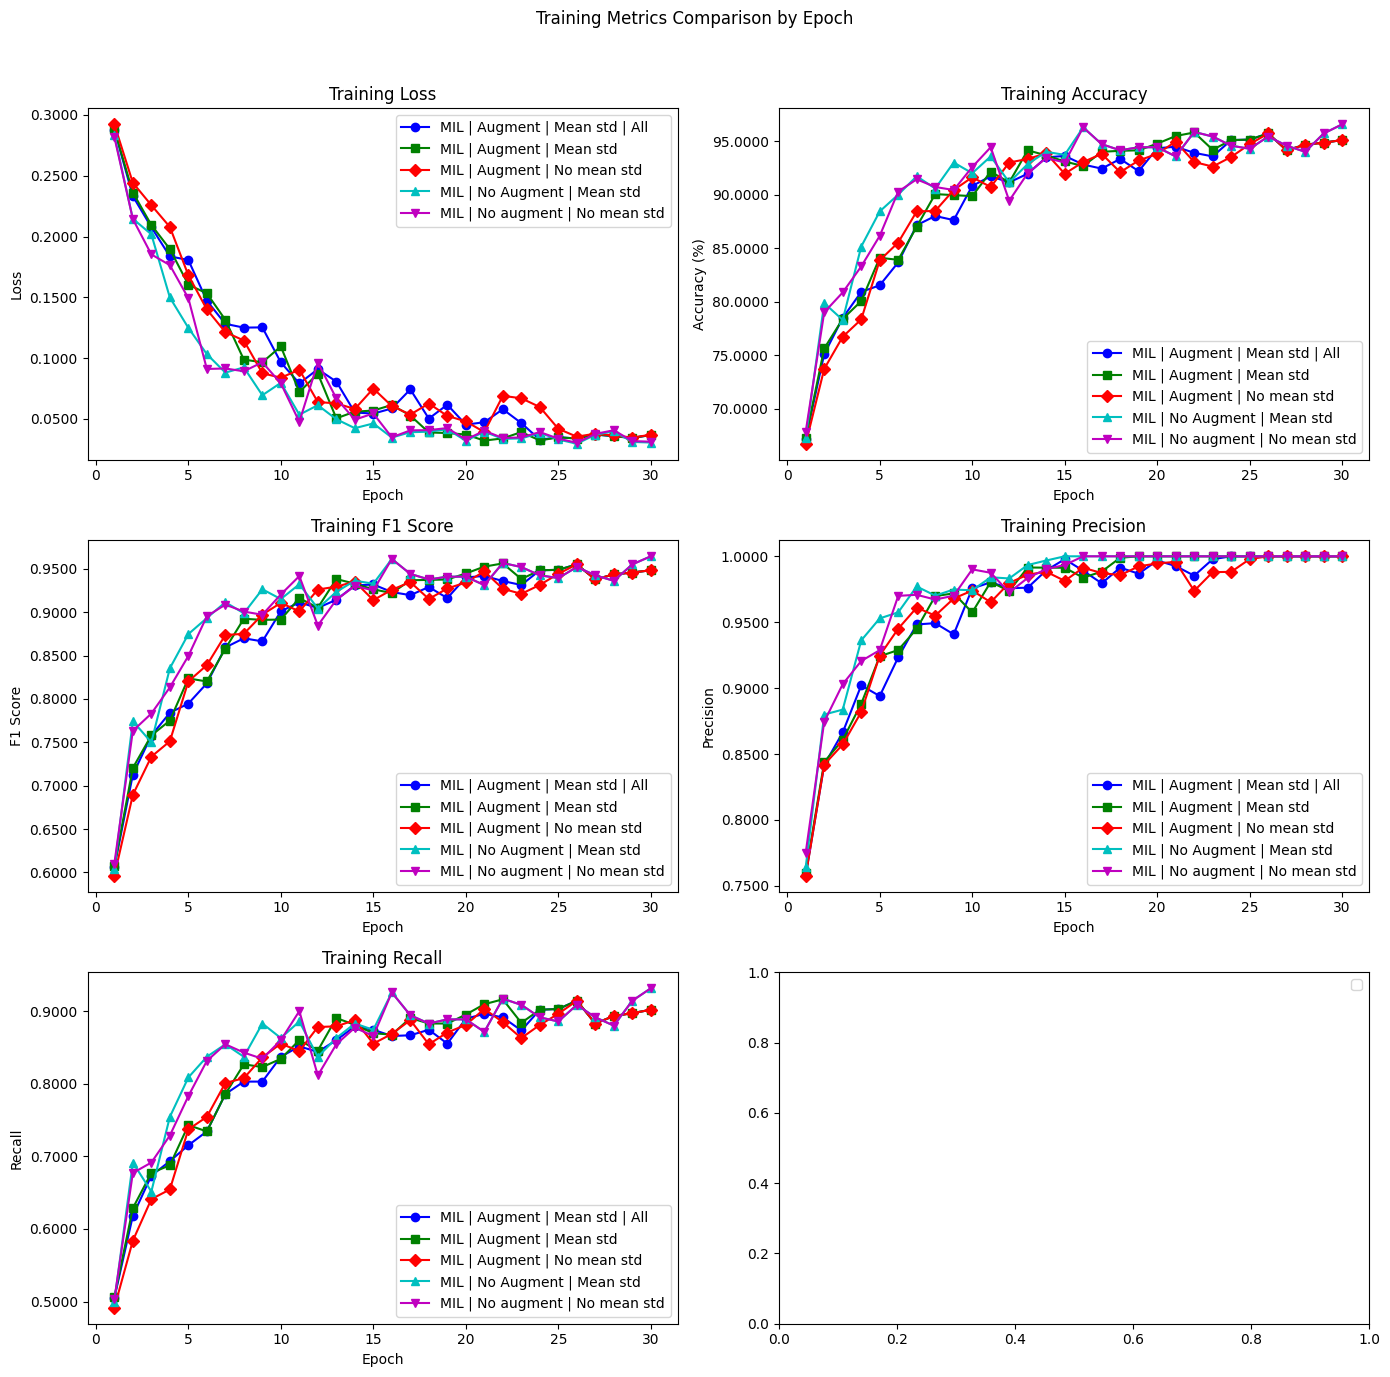

C:\Users\MINH\AppData\Local\Temp\ipykernel_2824\2839912829.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


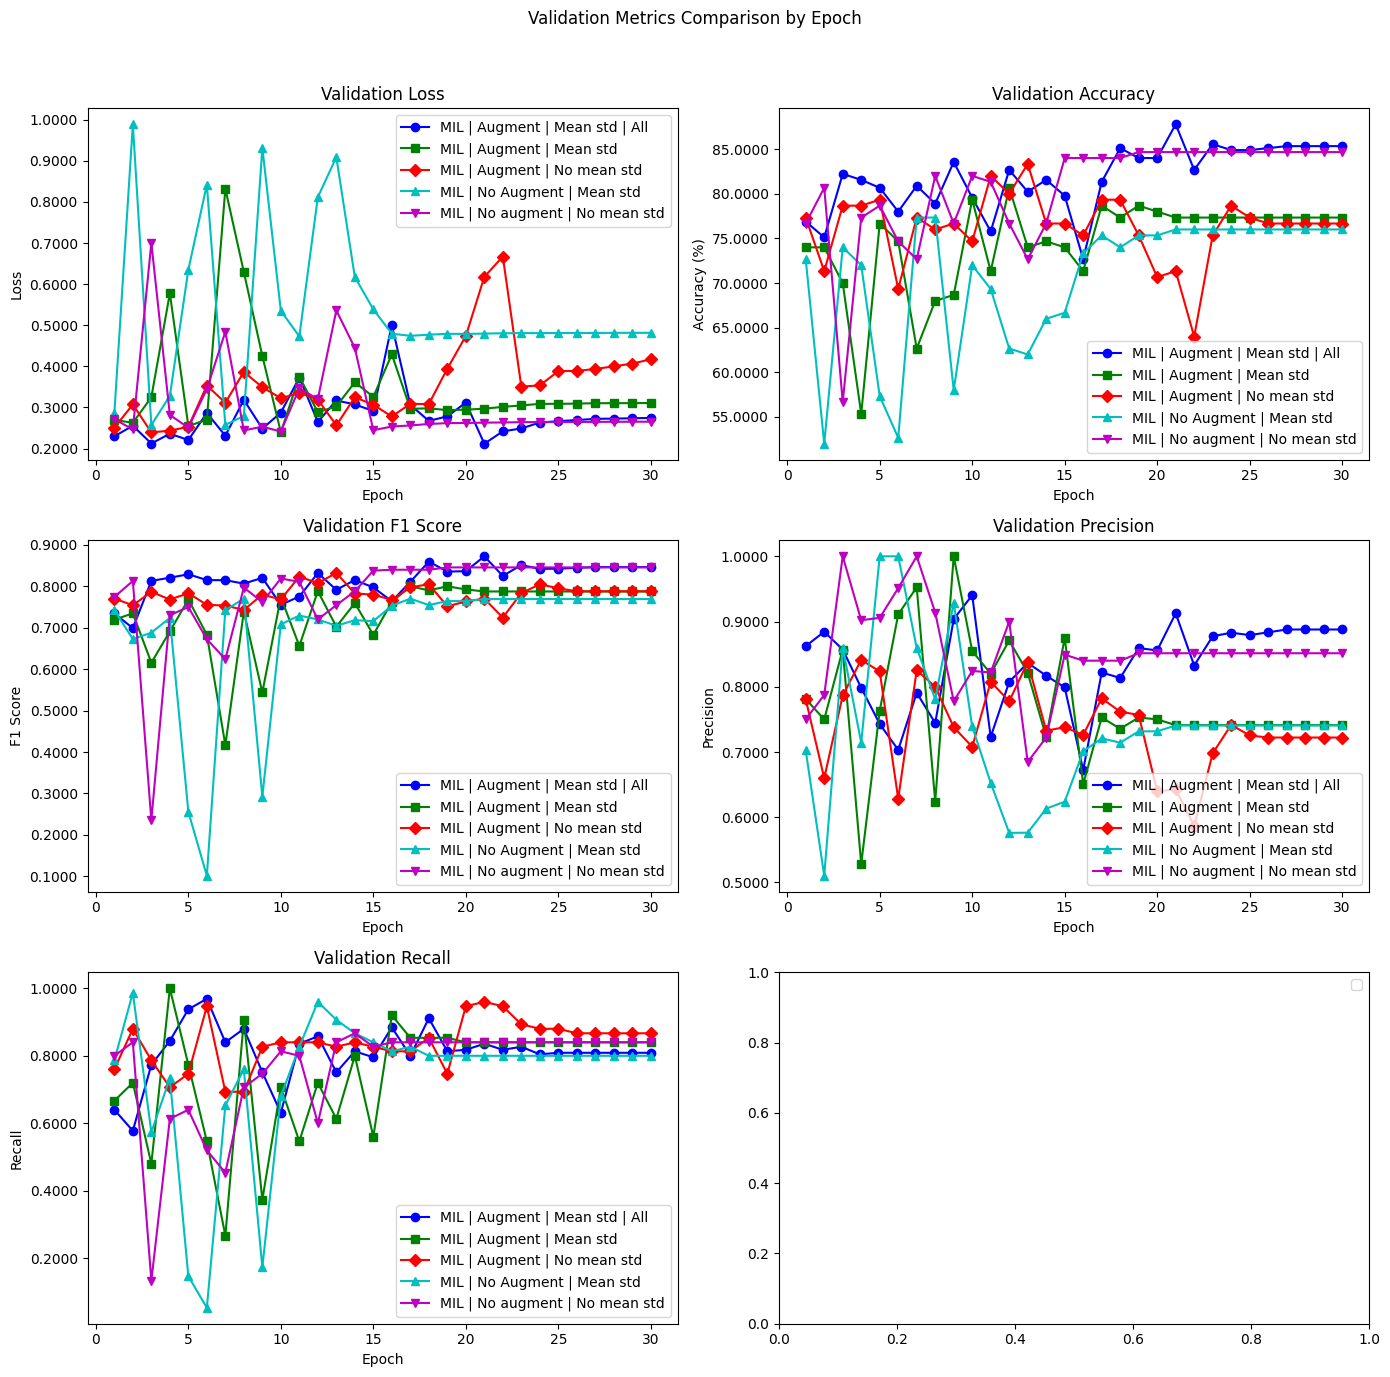

In [2]:
# Regular expressions to extract values
epoch_pattern = re.compile(
    r"Epoch (\d+): Loss: ([\d.]+), Accuracy: ([\d.]+)%, F1 Score: ([\d.]+), Precision: ([\d.]+), Recall: ([\d.]+)\s*"
    r"Validation Loss: ([\d.]+), Validation Accuracy: ([\d.]+)%, F1 Score: ([\d.]+), Precision: ([\d.]+), Recall: ([\d.]+)"
)
test_pattern = re.compile(
    r"Test Accuracy: ([\d.]+)%, Test Loss: ([\d.]+)\s*Test F1 Score: ([\d.]+), Test Precision: ([\d.]+), Test Recall: ([\d.]+)"
)

# Define experiment names - REPLACE THIS LIST WITH YOUR EXPERIMENT NAMES
experiment_names = ["MIL | Augment | Mean std | All", "MIL | Augment | Mean std", "MIL | Augment | No mean std", "MIL | No Augment | Mean std", "MIL | No augment | No mean std"]  # Add names as needed

# Lists to store all extracted values
all_epochs = []
all_train_losses = []
all_train_accuracies = []
all_train_f1_scores = []
all_train_precisions = []
all_train_recalls = []
all_val_losses = []
all_val_accuracies = []
all_val_f1_scores = []
all_val_precisions = []
all_val_recalls = []
all_test_results = []

# Process each paragraph
for i, paragraph in enumerate(paragraphs):
    epochs = []
    train_losses = []
    train_accuracies = []
    train_f1_scores = []
    train_precisions = []
    train_recalls = []
    val_losses = []
    val_accuracies = []
    val_f1_scores = []
    val_precisions = []
    val_recalls = []

    # Extract epoch values
    for match in epoch_pattern.finditer(paragraph):
        epochs.append(int(match.group(1)))
        train_losses.append(round(float(match.group(2)), 4))
        train_accuracies.append(round(float(match.group(3)), 4))
        train_f1_scores.append(round(float(match.group(4)), 4))
        train_precisions.append(round(float(match.group(5)), 4))
        train_recalls.append(round(float(match.group(6)), 4))
        val_losses.append(round(float(match.group(7)), 4))
        val_accuracies.append(round(float(match.group(8)), 4))
        val_f1_scores.append(round(float(match.group(9)), 4))
        val_precisions.append(round(float(match.group(10)), 4))
        val_recalls.append(round(float(match.group(11)), 4))

    # Extract test values
    test_match = test_pattern.search(paragraph)
    if test_match:
        test_results = {
            'accuracy': round(float(test_match.group(1)), 4),
            'loss': round(float(test_match.group(2)), 4),
            'f1': round(float(test_match.group(3)), 4),
            'precision': round(float(test_match.group(4)), 4),
            'recall': round(float(test_match.group(5)), 4)
        }
    else:
        test_results = None

    all_epochs.append(epochs)
    all_train_losses.append(train_losses)
    all_train_accuracies.append(train_accuracies)
    all_train_f1_scores.append(train_f1_scores)
    all_train_precisions.append(train_precisions)
    all_train_recalls.append(train_recalls)
    all_val_losses.append(val_losses)
    all_val_accuracies.append(val_accuracies)
    all_val_f1_scores.append(val_f1_scores)
    all_val_precisions.append(val_precisions)
    all_val_recalls.append(val_recalls)
    all_test_results.append(test_results)

def format_axis_ticks(ax, precision=4):
    """Format axis ticks to show specified number of decimal places"""
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter(f'%.{precision}f'))

# Ensure we have enough experiment names
if len(experiment_names) < len(paragraphs):
    raise ValueError(f"Not enough experiment names provided. Expected {len(paragraphs)}, got {len(experiment_names)}")

# Plotting training results
fig, axs = plt.subplots(3, 2, figsize=(14, 14))
fig.suptitle('Training Metrics Comparison by Epoch')

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', 's', 'D', '^', 'v', '<', '>']

for i in range(len(paragraphs)):
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    label = experiment_names[i]  # Use experiment name instead of paragraph number
    
    # Loss plot
    axs[0, 0].plot(all_epochs[i], all_train_losses[i], marker=marker, color=color, label=label)
    axs[0, 0].set_title('Training Loss')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Loss')
    format_axis_ticks(axs[0, 0])
    
    # Accuracy plot
    axs[0, 1].plot(all_epochs[i], all_train_accuracies[i], marker=marker, color=color, label=label)
    axs[0, 1].set_title('Training Accuracy')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Accuracy (%)')
    format_axis_ticks(axs[0, 1])
    
    # F1 Score plot
    axs[1, 0].plot(all_epochs[i], all_train_f1_scores[i], marker=marker, color=color, label=label)
    axs[1, 0].set_title('Training F1 Score')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('F1 Score')
    format_axis_ticks(axs[1, 0])
    
    # Precision plot
    axs[1, 1].plot(all_epochs[i], all_train_precisions[i], marker=marker, color=color, label=label)
    axs[1, 1].set_title('Training Precision')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Precision')
    format_axis_ticks(axs[1, 1])
    
    # Recall plot
    axs[2, 0].plot(all_epochs[i], all_train_recalls[i], marker=marker, color=color, label=label)
    axs[2, 0].set_title('Training Recall')
    axs[2, 0].set_xlabel('Epoch')
    axs[2, 0].set_ylabel('Recall')
    format_axis_ticks(axs[2, 0])

# Add legends
for ax in axs.flat:
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plotting validation results
fig, axs = plt.subplots(3, 2, figsize=(14, 14))
fig.suptitle('Validation Metrics Comparison by Epoch')

for i in range(len(paragraphs)):
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    label = experiment_names[i]  # Use experiment name instead of paragraph number
    
    # Loss plot
    axs[0, 0].plot(all_epochs[i], all_val_losses[i], marker=marker, color=color, label=label)
    axs[0, 0].set_title('Validation Loss')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Loss')
    format_axis_ticks(axs[0, 0])
    
    # Accuracy plot
    axs[0, 1].plot(all_epochs[i], all_val_accuracies[i], marker=marker, color=color, label=label)
    axs[0, 1].set_title('Validation Accuracy')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Accuracy (%)')
    format_axis_ticks(axs[0, 1])
    
    # F1 Score plot
    axs[1, 0].plot(all_epochs[i], all_val_f1_scores[i], marker=marker, color=color, label=label)
    axs[1, 0].set_title('Validation F1 Score')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('F1 Score')
    format_axis_ticks(axs[1, 0])
    
    # Precision plot
    axs[1, 1].plot(all_epochs[i], all_val_precisions[i], marker=marker, color=color, label=label)
    axs[1, 1].set_title('Validation Precision')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Precision')
    format_axis_ticks(axs[1, 1])
    
    # Recall plot
    axs[2, 0].plot(all_epochs[i], all_val_recalls[i], marker=marker, color=color, label=label)
    axs[2, 0].set_title('Validation Recall')
    axs[2, 0].set_xlabel('Epoch')
    axs[2, 0].set_ylabel('Recall')
    format_axis_ticks(axs[2, 0])

# Add legends
for ax in axs.flat:
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

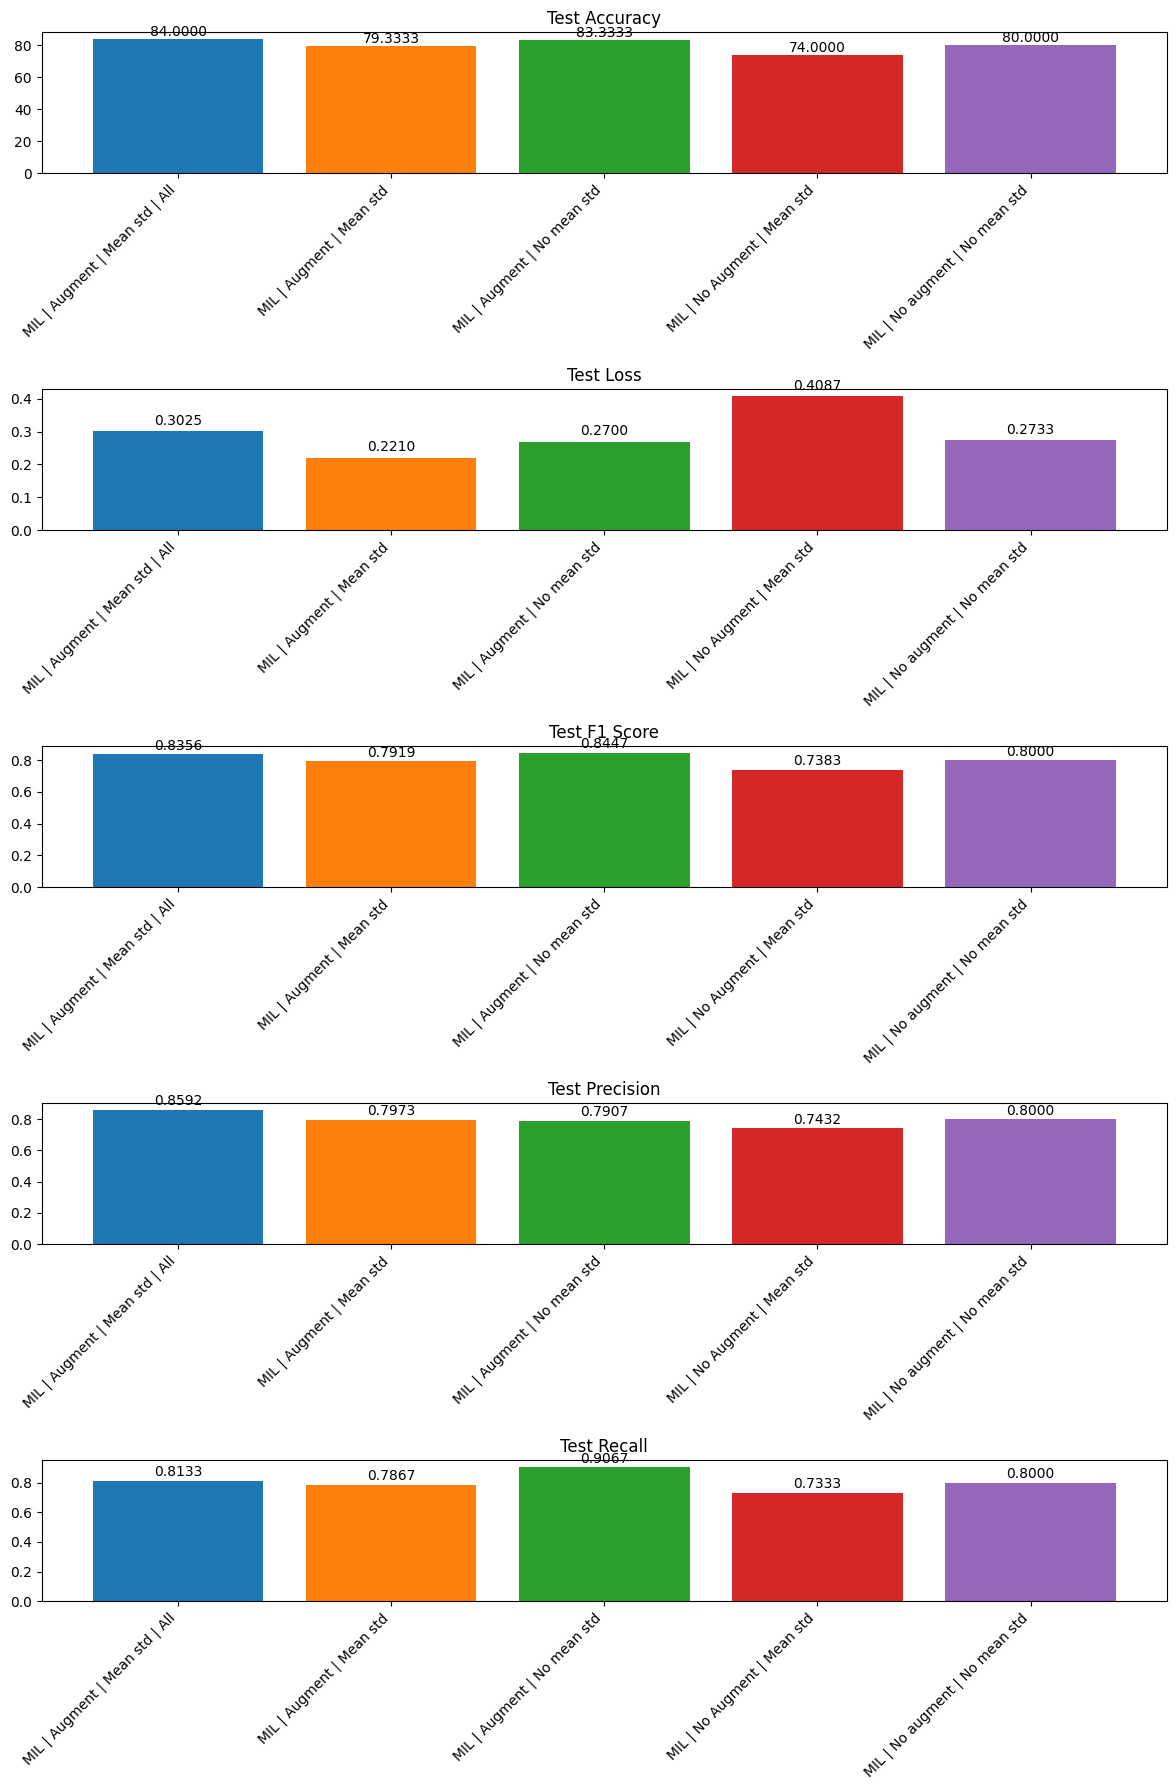

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Sample test results
results = [
    """
    Test Accuracy: 84.0000%, Test Loss: 0.3025
    Test F1 Score: 0.8356, Test Precision: 0.8592, Test Recall: 0.8133
    """,
    """
    Test Accuracy: 79.3333%, Test Loss: 0.2210
    Test F1 Score: 0.7919, Test Precision: 0.7973, Test Recall: 0.7867
    """,
    """
    Test Accuracy: 83.3333%, Test Loss: 0.2700
    Test F1 Score: 0.8447, Test Precision: 0.7907, Test Recall: 0.9067
    """,
    """
    Test Accuracy: 74.0000%, Test Loss: 0.4087
    Test F1 Score: 0.7383, Test Precision: 0.7432, Test Recall: 0.7333
    """,
    """
    Test Accuracy: 80.0000%, Test Loss: 0.2733
    Test F1 Score: 0.8000, Test Precision: 0.8000, Test Recall: 0.8000
    """
]

# Experiment names
experiment_names = [
    "MIL | Augment | Mean std | All",
    "MIL | Augment | Mean std",
    "MIL | Augment | No mean std",
    "MIL | No Augment | Mean std",
    "MIL | No augment | No mean std"
]

# Initialize metrics dictionary
metrics = {
    'Test Accuracy': [], 
    'Test Loss': [], 
    'Test F1 Score': [], 
    'Test Precision': [], 
    'Test Recall': []
}

# Extract metrics using regex
for result in results:
    accuracy_match = re.search(r'Test Accuracy:\s*([\d.]+)%', result)
    loss_match = re.search(r'Test Loss:\s*([\d.]+)', result)
    f1_match = re.search(r'Test F1 Score:\s*([\d.]+)', result)
    precision_match = re.search(r'Test Precision:\s*([\d.]+)', result)
    recall_match = re.search(r'Test Recall:\s*([\d.]+)', result)
    
    if accuracy_match:
        metrics['Test Accuracy'].append(float(accuracy_match.group(1)))
    if loss_match:
        metrics['Test Loss'].append(float(loss_match.group(1)))
    if f1_match:
        metrics['Test F1 Score'].append(float(f1_match.group(1)))
    if precision_match:
        metrics['Test Precision'].append(float(precision_match.group(1)))
    if recall_match:
        metrics['Test Recall'].append(float(recall_match.group(1)))

# Create subplots for each metric with increased width
fig, axs = plt.subplots(len(metrics), 1, figsize=(12, 18))

# Plot each metric with different colors for each experiment
colors = plt.cm.tab10(np.arange(len(experiment_names)))  # Generate colors for each experiment

for i, (metric, values) in enumerate(metrics.items()):
    
    bars = axs[i].bar(experiment_names, values, color=colors)  
    
    # Set title and labels for each subplot
    axs[i].set_title(metric)
    
    # Ensure y-axis starts at zero
    axs[i].set_ylim(bottom=0)  
    
    # Explicitly set x-ticks before setting labels to avoid warnings
    axs[i].set_xticks(np.arange(len(experiment_names)))  
    axs[i].set_xticklabels(experiment_names, rotation=45, ha='right')
    
    # Add value labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2., yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
